<a href="https://colab.research.google.com/github/sofia604/DEA113/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
url = 'https://raw.githubusercontent.com/sofia604/DEA113/refs/heads/main/exercise_data.csv'
data = pd.read_csv(url)
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [6]:
data.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [8]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


Missing Values Analysis

In [9]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [10]:
#To get the percentage of null values in each colum
data.isnull().sum()/(len(data))*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [11]:
data.shape

(32, 5)

In [12]:
#Removing the pulse olumn
data = data.drop('Pulse', axis=1)

In [10]:
data.head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


Working with Date & Time

In [13]:
from datetime import date
print(date.today().year)
print(date.today().month)
print(date.today())

2025
1
2025-01-30


In [14]:
from datetime import datetime
current_time = datetime.now()
print(current_time)
print("Current Time: ",current_time.strftime("%H:%M:%S"))

2025-01-30 01:31:53.384719
Current Time:  01:31:53


In [16]:
#Calculate the difference between pulse and maxpulse and store it in a new column "DifferenceOfPulse"
data['DifferenceOfPulse'] = data['Maxpulse'] - data['Pulse']
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


**Handling Missing Values**
Different ways of handling missin values:
1. Mean
2. Mode
3. Median
4. Drop those rows

In [17]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31
5,60,06-12-2020,102,127,300.0,25
6,60,07-12-2020,110,136,374.0,26
7,450,08-12-2020,104,134,253.3,30
8,30,09-12-2020,109,133,195.1,24
9,60,10-12-2020,98,124,269.0,26


In [18]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())

In [19]:
print("Mean of Maxpulse is: ",data['Maxpulse'].mean())
print("Median of Maxpulse is: ",data['Maxpulse'].median())
print("Mode of Maxpulse is: ",data['Maxpulse'].mode()[0])

Mean of Maxpulse is:  128.5
Median of Maxpulse is:  127.5
Mode of Maxpulse is:  120


In [20]:
#Mean, Median, Mode of Calories
print("Mean of Calories is: ",data['Calories'].mean())
print("Median of Calories is: ",data['Calories'].median())
print("Mode of Calories is: ",data['Calories'].mode()[0])

Mean of Calories is:  304.67999999999995
Median of Calories is:  300.0
Mode of Calories is:  300.0


In [21]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.10,20
1,60,02-12-2020,117,145,479.00,28
2,60,03-12-2020,103,135,340.00,32
3,45,04-12-2020,109,175,282.40,66
4,45,05-12-2020,117,148,406.00,31
5,60,06-12-2020,102,127,300.00,25
6,60,07-12-2020,110,136,374.00,26
7,450,08-12-2020,104,134,253.30,30
8,30,09-12-2020,109,133,195.10,24
9,60,10-12-2020,98,124,269.00,26


In [22]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,0
DifferenceOfPulse,0


In [23]:
data_cleaned = data.dropna()

In [24]:
data_cleaned.shape

(31, 6)

In [25]:
data = data.dropna(subset=['Calories'])
#Delete nulls from Calories only
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,0
DifferenceOfPulse,0


In [26]:
data.shape

(32, 6)

In [29]:
#Creating Data frame
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York']
})

#Printing the data frame
print(tempData)

    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2   NaN  55000.0            NaN
3  35.0      NaN        Chicago
4  40.0  65000.0       New York


In [30]:
tempData["Age"].fillna(tempData["Age"].mean(), inplace=True)
tempData["Salary"].fillna(tempData["Salary"].median(), inplace=True)
tempData["City"].fillna(tempData["City"].mode()[0], inplace=True)
print(tempData)

    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2  32.5  55000.0       New York
3  35.0  57500.0        Chicago
4  40.0  65000.0       New York


<ipython-input-30-2eaf04a69088>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tempData["Age"].fillna(tempData["Age"].mean(), inplace=True)
<ipython-input-30-2eaf04a69088>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Visualization with pandas

<Axes: >

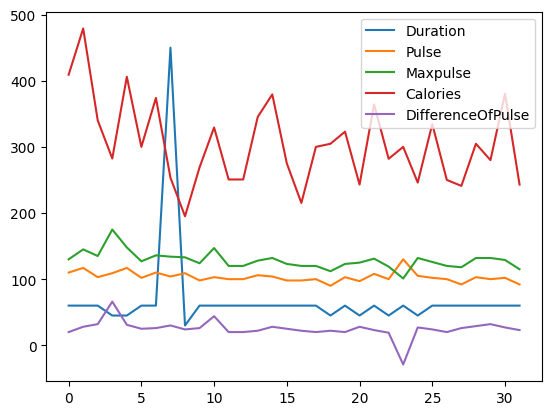

In [31]:
data.plot()

<Axes: >

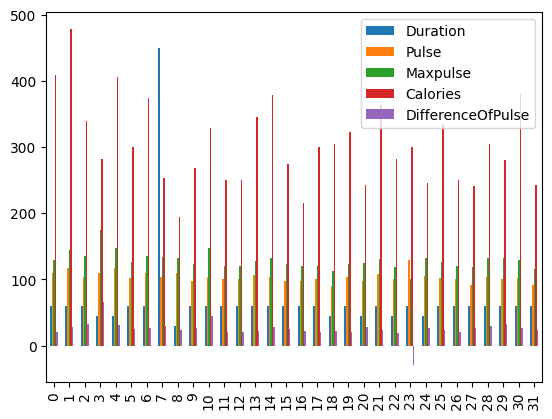

In [34]:
data.plot(kind='bar')

<Axes: >

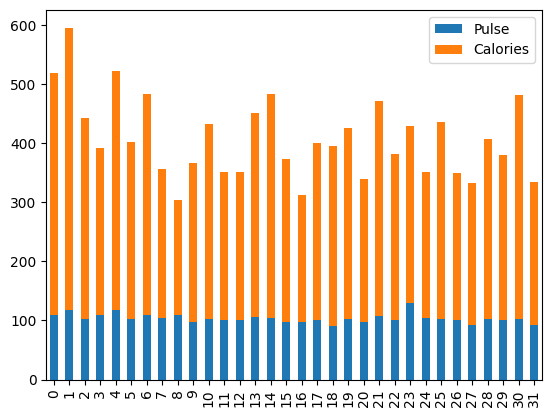

In [32]:
barData = data[["Pulse","Calories"]]
barData.plot(kind="bar",stacked=True)

### Scatter

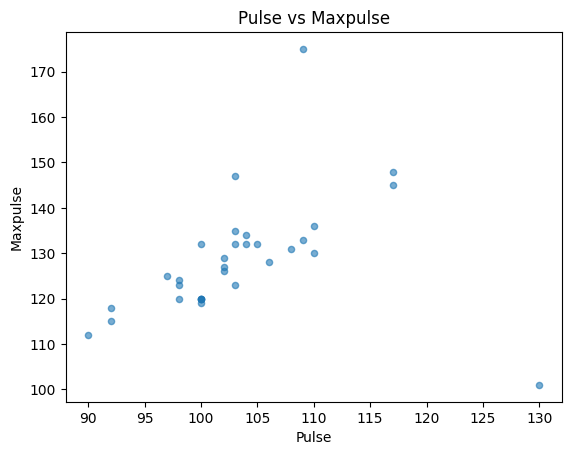

In [33]:
data.plot(kind="scatter", x="Pulse", y="Maxpulse", alpha=0.6)
plt.title('Pulse vs Maxpulse')
plt.show()

### Correlation Matrix

In [35]:
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


In [36]:
numerical_data = data.drop(columns=['Date'])
numerical_data.head()

,Duration,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,110,130,409.1,20
1,60,117,145,479.0,28
2,60,103,135,340.0,32
3,45,109,175,282.4,66
4,45,117,148,406.0,31


In [37]:
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Duration     Pulse  Maxpulse  Calories  DifferenceOfPulse
Duration           1.000000  0.004410  0.049959 -0.113923           0.046612
Pulse              0.004410  1.000000  0.276583  0.487017          -0.321259
Maxpulse           0.049959  0.276583  1.000000  0.347419           0.821194
Calories          -0.113923  0.487017  0.347419  1.000000           0.053162
DifferenceOfPulse  0.046612 -0.321259  0.821194  0.053162           1.000000


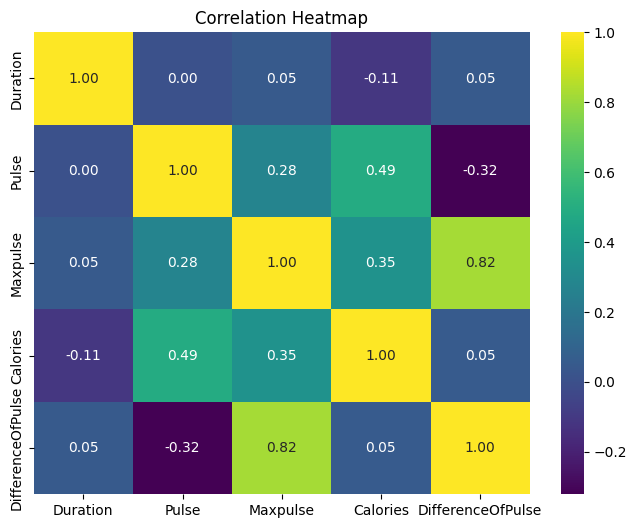

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()